In [1]:
import numpy as np
import timeit
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image
from main import MeasurementControlEnvironment

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [2]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment()
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


### Run the search

In [3]:
# Get starting state
state = env.get_state()
print(f'Starting car state: {state[0]}')
# rl.plot_state_image(state)

print('Starting MCTS search...')
start_time = timeit.default_timer()
best_action_idx, root = mcts_search(env, rl, state, learning_iterations=2000,
                                    explore_factor=0.5, discount_factor=0.9)
print(f'Finished in {timeit.default_timer() - start_time} seconds')

Starting car state: [30.         20.         10.          0.78539816  0.          0.        ]
Starting MCTS search...
Finished in 1.6123189410027408 seconds


### Plot (also open tree_visualization.html in browser)

Making tree visualization, this takes a while for a large tree...
Plotting starting state with search tree overlayed...
Getting best action trajectory...
Actions in best trajectory:
[[ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [-1.  -1. ]
 [ 1.  -1. ]
 [ 1.  -1. ]
 [ 0.5 -1. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.5  1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 1.  -1. ]
 [-1.  -1. ]
 [-1.  -1. ]
 [ 0.5 -1. ]
 [ 0.   0. ]]


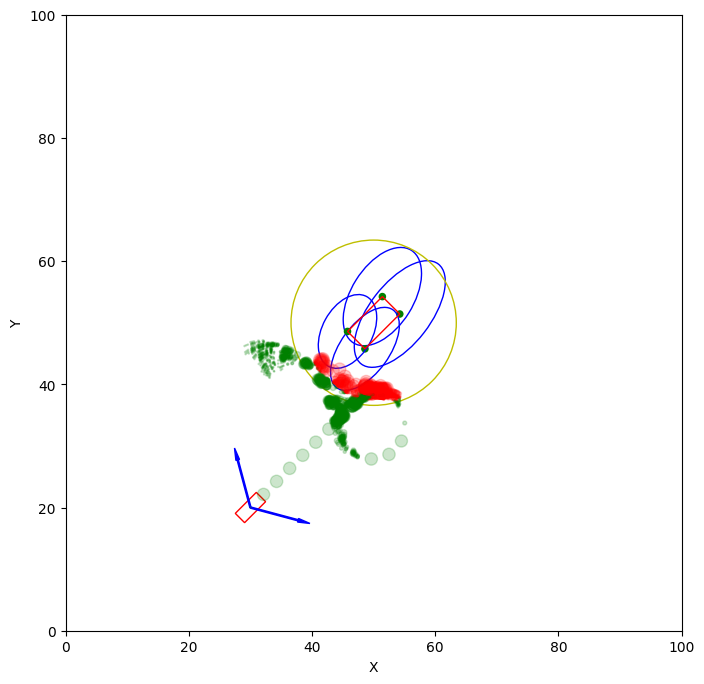

In [4]:
# Create the tree visualization html file
print('Making tree visualization, this takes a while for a large tree...')
render_pyvis(root, env.action_space, show_unsimulated=False)

# Plot the starting state with the search tree overlayed
print('Plotting starting state with search tree overlayed...')
env.draw_state(state, explore_grid=False, root_node=root, scaling=4, bias=0.1, max=1., rew=True)

# Get the action trajectory
print('Getting best action trajectory...')
actions = get_best_action_trajectory(root, highest_Q=True)
print(f'Actions in best trajectory:\n{np.array(actions)}')
shown_actions = actions[:-1] # Truncate actions to only show the first so many (otherwise plotting takes forever)
env.draw_action_set(state, shown_actions)

In [5]:
# Check inference time
print('Checking inference time...')
state = env.get_state()
start_time = timeit.default_timer()
rl.inference(state)
print(f'Inference time: {timeit.default_timer() - start_time} seconds')

Checking inference time...


ValueError: too many values to unpack (expected 4)